In [92]:
import utils
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df = pd.read_csv('shot_logs.csv')

In [94]:
# Choose the features
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
    "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
#     "FGM",  # cant have this because it is knowledge from after the shot (indicates result)
]

non_scaled_features = [
#     "PTS_TYPE"
]

advanced_features = [
    "LOCATION",
    "GAME_ID",
    "MATCHUP",
    "player_id",
    "CLOSEST_DEFENDER_PLAYER_ID",
]
target = ['PTS']

In [95]:
# Run normalization functions
df['SHOT_CLOCK'] = utils.normalize_shotclock(df['SHOT_CLOCK'])
df['LOCATION'] = utils.normalize_location(df['LOCATION'])
df['PTS'] = np.float64(df['PTS'])
features.remove("PTS_TYPE")
df = utils.rescale_features(features, df, non_scaled_features)
features.append("PTS_TYPE")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)

In [97]:
model = LinearRegression(normalize=True, n_jobs=-1)

In [98]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.034925015143826066

In [99]:
def get_score(X_train, y_train):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [100]:
def shuffle_y(X_train, y_train):
    '''
    Randomly shuffles training shot values in place, refits model then returns score
    '''
    np.random.shuffle(y_train)
    return get_score(X_train, y_train)

In [101]:
y = y_train.as_matrix()

In [102]:
model.fit(X_train, y)
actual = model.score(X_test, y_test)

In [105]:
results = []
for i in range(100):
    np.random.shuffle(y)
    model.fit(X_train, y)
    result = model.score(X_test, y_test)
    results.append(result)

(array([  1.,   5.,   8.,  12.,  22.,  14.,  15.,   8.,  11.,   4.]),
 array([-0.00322705, -0.00265783, -0.00208862, -0.0015194 , -0.00095018,
        -0.00038097,  0.00018825,  0.00075747,  0.00132668,  0.0018959 ,
         0.00246512]),
 <a list of 10 Patch objects>)

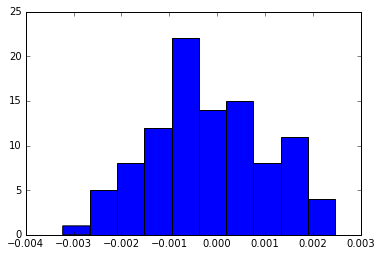

In [106]:
plt.hist(results)